Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

3.Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора. Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

In [3]:
boston = load_boston()

X = pd.DataFrame(boston["data"], columns=boston["feature_names"])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [4]:
y = pd.DataFrame(boston["target"], columns=["price"])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
price    506 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [8]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [11]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


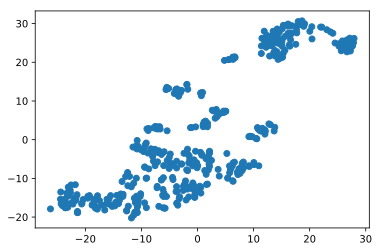

In [12]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

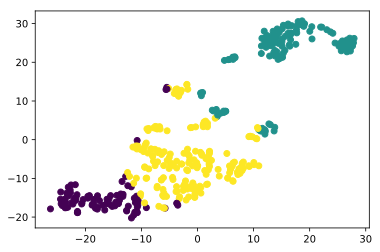

In [25]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=3, random_state=42, max_iter=100)



labels_train = kmeans_model.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [22]:
print(y_train[labels_train == 0].mean())
print(y_train[labels_train == 1].mean())
print(y_train[labels_train == 2].mean())

price    23.874839
dtype: float64
price    14.906383
dtype: float64
price    23.228571
dtype: float64


In [30]:
print(X_train["CRIM"].mean())

3.609124628712873


In [39]:
print('X_train Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'RM'].mean()))
print('X_train Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'RM'].mean()))
print('X_train Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'RM'].mean()))

X_train Кластер 0: 6.6485232558139575
X_train Кластер 1: 5.964007874015744
X_train Кластер 2: 6.400094240837695


In [62]:
labels_train2 = kmeans_model.predict(X_test_scaled)



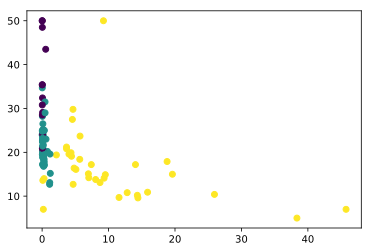

In [65]:
plt.scatter(X_test["CRIM"], y_test, c=labels_train2)

plt.show()

In [68]:
print('X_test CRIM Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('y_test price Кластер 0: {}'.format(y_train.loc[labels_train == 0, 'price'].mean()))

print('X_test CRIM Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('y_test price Кластер 1: {}'.format(y_train.loc[labels_train == 1, 'price'].mean()))

print('X_test CRIM Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))
print('y_test price Кластер 2: {}'.format(y_train.loc[labels_train == 2, 'price'].mean()))

X_test CRIM Кластер 0: 0.07356558139534886
y_test price Кластер 0: 27.788372093023252
X_test CRIM Кластер 1: 10.797028425196853
y_test price Кластер 1: 16.165354330708666
X_test CRIM Кластер 2: 0.42166020942408367
y_test price Кластер 2: 24.958115183246072
